# Test the Raw VCI product

In [17]:
import pandas as pd
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from typing import List, Tuple, Dict, Union, Optional

import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 150

import os

# set the working directory
current_path = Path('.').resolve()
if current_path == Path('/home/tommy/ml_drought/notebooks/draft'):
    os.chdir(current_path.parents[1].as_posix())

current_path = Path('.').resolve()
assert current_path.name == "ml_drought"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load in the Preprocessed data

In [18]:
data_dir = Path("/cats/datastore/data")
assert data_dir.exists()

In [19]:
[f for f in (data_dir / "interim/mantle_modis_preprocessed").iterdir()]

[PosixPath('/cats/datastore/data/interim/mantle_modis_preprocessed/data_kenya.nc')]

In [20]:
ds = xr.open_dataset((data_dir / "interim/mantle_modis_preprocessed/data_kenya.nc"))
ds

<xarray.Dataset>
Dimensions:    (lat: 1255, lon: 983, time: 684)
Coordinates:
  * lat        (lat) float64 6.0 5.991 5.982 5.973 ... -5.179 -5.187 -5.196
  * lon        (lon) float64 33.51 33.52 33.53 33.54 ... 42.25 42.26 42.27 42.28
  * time       (time) datetime64[ns] 2001-10-10 2001-10-20 ... 2020-10-20
Data variables:
    modis_vci  (time, lat, lon) int64 ...

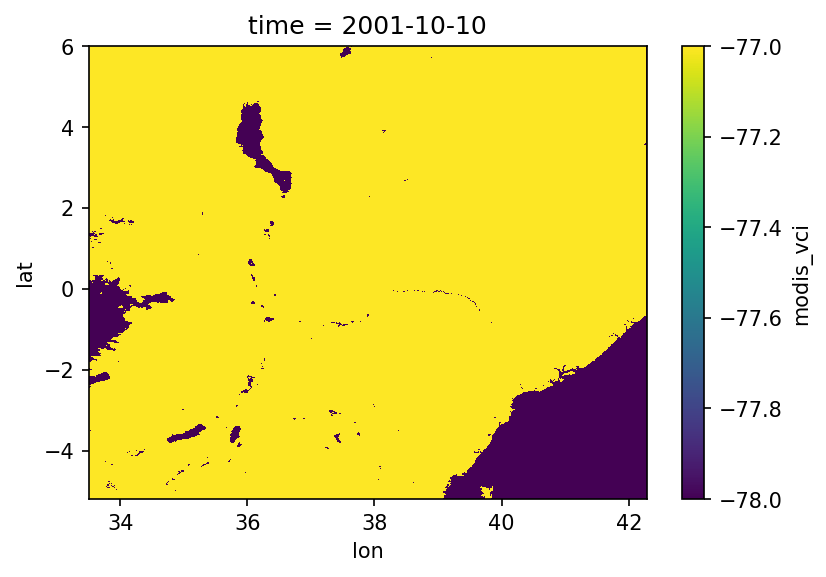

In [21]:
ds.modis_vci.isel(time=0).plot()

In [22]:
da = ds["modis_vci"].where((ds["modis_vci"] >= 6) & (ds["modis_vci"] <= 250) )
da = da - 78

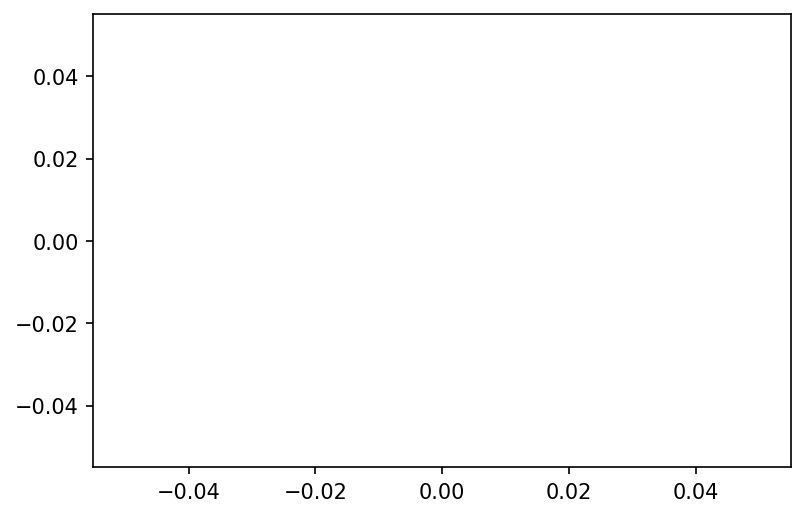

In [11]:
sns.distplot(da.isel(time=0).values)

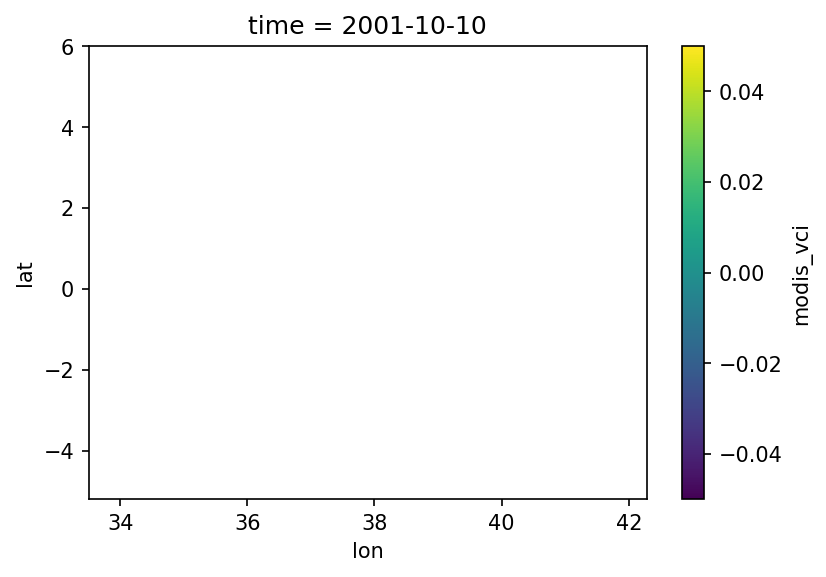

In [7]:
da.isel(time=0).plot()

# Why are there more values <0 and >100?

In [8]:
fix = da.where((da<=100) & (da>=0))

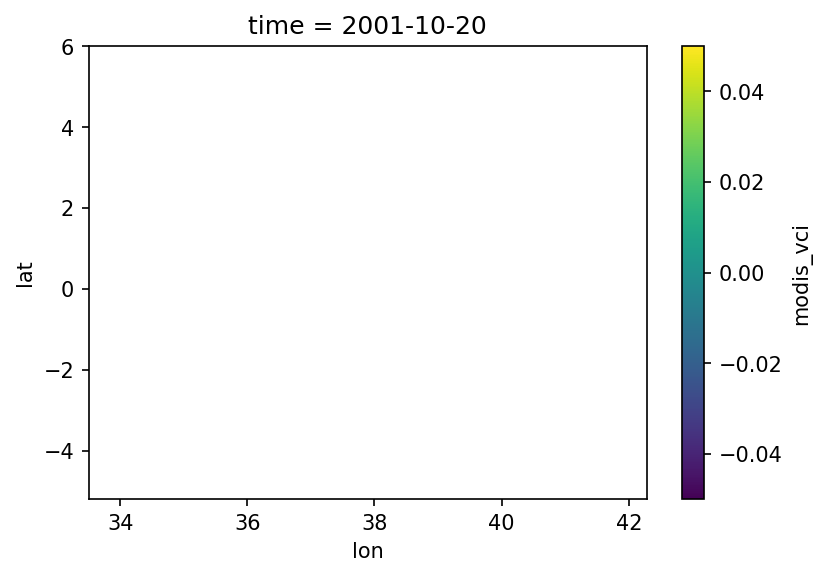

In [9]:
fix.isel(time=1).plot()

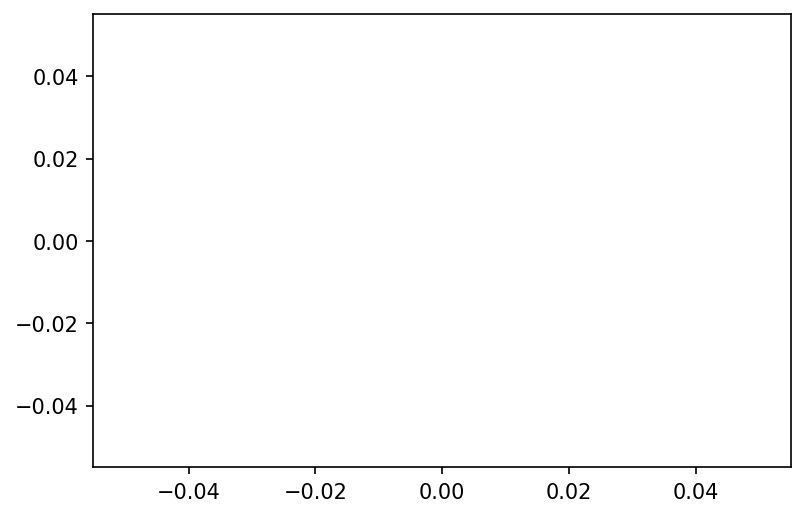

In [10]:
sns.distplot(fix.isel(time=0).values)